# Check out JPMaQS

This introductory notebook serves as a guide for using macro-quantamental datasets of the J.P. Morgan Macrosynergy Quantamental System (JPMaQS), providing an overview of the dataset's conventions and structure. It also displays some simple example code data analysis, including data slicing, data visualization,  frequency conversions, and lagging/differencing indicators.  

## Prerequisites

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
import os
import sys
sys.path.append('./macrosynergy')
#os.environ['KAGGLEHUB_CACHE'] = './kaggle'
#macrosynergy_fixed_income_returns_and_macro_trends_path = kagglehub.dataset_download('macrosynergy/fixed-income-returns-and-macro-trends')
macrosynergy_fixed_income_returns_and_macro_trends_path = '/kaggle'
print('Data source import complete.')
print('Data source path:', macrosynergy_fixed_income_returns_and_macro_trends_path)

Data source import complete.
Data source path: ./kaggle\datasets\macrosynergy\fixed-income-returns-and-macro-trends\versions\17


In [28]:
# load the dataset:

dfd = pd.read_csv(macrosynergy_fixed_income_returns_and_macro_trends_path + '\JPMaQS_Quantamental_Indicators.csv', index_col=0, parse_dates=['real_date'])
display (dfd.head(3))
dfd.info()

,real_date,cid,xcat,value,grading,eop_lag,mop_lag
0,2000-01-03,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,95.0,292.0
1,2000-01-04,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,96.0,293.0
2,2000-01-05,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,97.0,294.0


<class 'pandas.core.frame.DataFrame'>
Index: 3390059 entries, 0 to 3390058
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   real_date  datetime64[ns]
 1   cid        object        
 2   xcat       object        
 3   value      float64       
 4   grading    float64       
 5   eop_lag    float64       
 6   mop_lag    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 206.9+ MB


To check the categories in a DataFrame, you can examine the unique values in specific columns. Definitions, conventions and explanations of the categories can be found under [Kaggle Dataset](https://www.kaggle.com/datasets/macrosynergy/fixed-income-returns-and-macro-trends)

In [29]:
print(dfd['cid'].unique())
print(dfd['xcat'].unique())

['AUD' 'CAD' 'CHF' 'CLP' 'COP' 'CZK' 'EUR' 'GBP' 'HUF' 'IDR' 'ILS' 'INR'
 'JPY' 'KRW' 'MXN' 'NOK' 'NZD' 'PLN' 'SEK' 'THB' 'TRY' 'TWD' 'USD' 'ZAR']
['CPIC_SA_P1M1ML12' 'CPIC_SJA_P3M3ML3AR' 'CPIC_SJA_P6M6ML6AR'
 'CPIH_SA_P1M1ML12' 'CPIH_SJA_P3M3ML3AR' 'CPIH_SJA_P6M6ML6AR'
 'DU02YXR_NSA' 'DU02YXR_VT10' 'DU05YXR_NSA' 'DU05YXR_VT10' 'EQXR_NSA'
 'EQXR_VT10' 'FXCRR_NSA' 'FXTARGETED_NSA' 'FXUNTRADABLE_NSA' 'FXXR_NSA'
 'FXXR_VT10' 'INFTEFF_NSA' 'INTRGDP_NSA_P1M1ML12_3MMA'
 'INTRGDPv5Y_NSA_P1M1ML12_3MMA' 'PCREDITBN_SJA_P1M1ML12'
 'PCREDITGDP_SJA_D1M1ML12' 'RGDP_SA_P1Q1QL4_20QMA' 'RYLDIRS02Y_NSA'
 'RYLDIRS05Y_NSA']


In [30]:
xcats=dfd['xcat'].unique()
cids=dfd['cid'].unique()
tickers = [
    cid + "_" + xcat for cid in cids for xcat in xcats
]  # all possible cross-section/ category combinations
print(f"Maximum number of tickers is {len(tickers)}")

Maximum number of tickers is 600


## Explanations of the category tickers 

Please see the **tickers**, **descriptions**, and **notes** for each category on the front page of the [Kaggle Dataset](https://www.kaggle.com/datasets/macrosynergy/fixed-income-returns-and-macro-trends)

In [31]:
# It is often helpful to append a ticker column as a concatenation of cid and xcat. This shortens the code for references to individual time series (as opposed to panels).
dfd['ticker'] = dfd['cid'] + "_" + dfd["xcat"]
dfd.head(3)

,real_date,cid,xcat,value,grading,eop_lag,mop_lag,ticker
0,2000-01-03,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,95.0,292.0,AUD_CPIC_SA_P1M1ML12
1,2000-01-04,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,96.0,293.0,AUD_CPIC_SA_P1M1ML12
2,2000-01-05,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,97.0,294.0,AUD_CPIC_SA_P1M1ML12


## JPMaQS time series dataframes

### Make a panel

Many data analyses as well as charting with `seaborn` and `matplotlib` can be done directly on the long dataframe.
However, it is also easy to extract one or more categories from the standard long JPMAQS dataframe into a standard time series panel dataframe, by using the `.pivot_table()` method as shown below. This format is useful for certain mathematical operations on categories and for passing them on to other packages, such as `scikit-learn`.

        real_date  cid                xcat     value  grading  eop_lag  \
857161 2000-01-26  EUR  CPIC_SJA_P6M6ML6AR  1.093003      2.0     26.0   
857162 2000-01-27  EUR  CPIC_SJA_P6M6ML6AR  1.093003      2.0     27.0   
857163 2000-01-28  EUR  CPIC_SJA_P6M6ML6AR  1.093003      2.0     28.0   
857164 2000-01-31  EUR  CPIC_SJA_P6M6ML6AR  1.093003      2.0     31.0   
857165 2000-02-01  EUR  CPIC_SJA_P6M6ML6AR  1.093003      2.0     32.0   

        mop_lag                  ticker  
857161    208.0  EUR_CPIC_SJA_P6M6ML6AR  
857162    209.0  EUR_CPIC_SJA_P6M6ML6AR  
857163    210.0  EUR_CPIC_SJA_P6M6ML6AR  
857164    213.0  EUR_CPIC_SJA_P6M6ML6AR  
857165    214.0  EUR_CPIC_SJA_P6M6ML6AR  


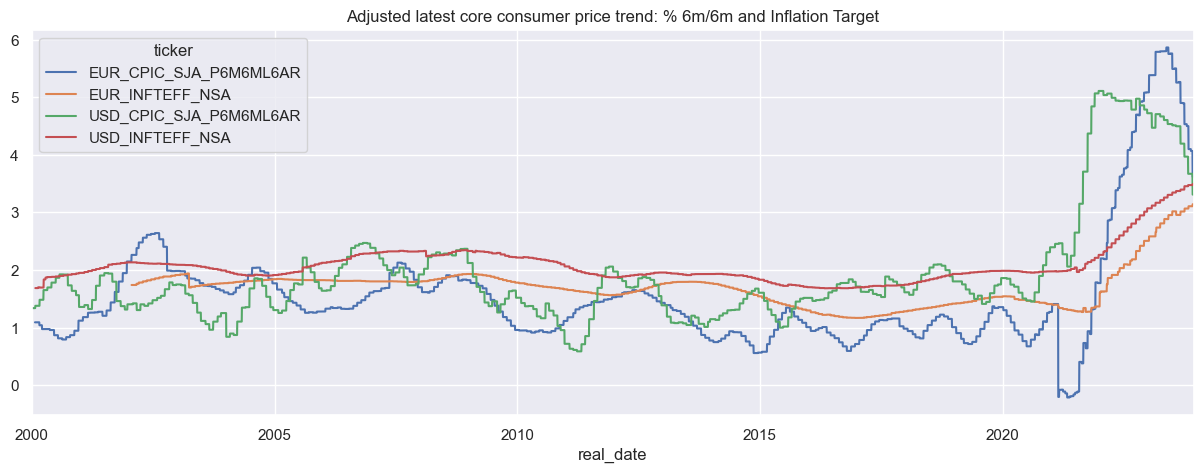

In [32]:
# Extract and pivot a single category panel (core inflation) for three chosen currencies

dfx = dfd[(dfd["xcat"].isin(["CPIC_SJA_P6M6ML6AR", "INFTEFF_NSA"])) & (dfd['cid'].isin(["USD", "EUR"]))] 
print(dfx.head())
# Pivot the selected dataframe into a "wide" time series format giving every ticker a column

dfw = dfx.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)

# Check out the panel

sns.set(rc={'figure.figsize':(15,5)})
dfw.plot(title="Adjusted latest core consumer price trend: % 6m/6m and Inflation Target")
plt.show()

In [33]:
print(dfw.head(3))
print(dfw.columns)

ticker      EUR_CPIC_SJA_P6M6ML6AR  EUR_INFTEFF_NSA  USD_CPIC_SJA_P6M6ML6AR  \
real_date                                                                     
2000-01-03                     NaN              NaN                1.339167   
2000-01-04                     NaN              NaN                1.339167   
2000-01-05                     NaN              NaN                1.339167   

ticker      USD_INFTEFF_NSA  
real_date                    
2000-01-03              NaN  
2000-01-04              NaN  
2000-01-05              NaN  
Index(['EUR_CPIC_SJA_P6M6ML6AR', 'EUR_INFTEFF_NSA', 'USD_CPIC_SJA_P6M6ML6AR',
       'USD_INFTEFF_NSA'],
      dtype='object', name='ticker')


### Slice a panel

Time series panels are easy to slice by column (with strings and regex) and by row (using intuitive Datetime conventions).

In [34]:
# Extract two categories and pivot to a time series dataframe (core CPI trend and estimated GDP trend)

xcats_sel = ["CPIC_SJA_P6M6ML6AR", "INTRGDPv5Y_NSA_P1M1ML12_3MMA"]
cids_sel = ["EUR", "USD"]
dfx = dfd.loc[dfd["xcat"].isin(xcats_sel) & dfd['cid'].isin(cids_sel), :]
dfw = dfx.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)  # pivot by ticker

# Replace technical names with something you understand

nicknames = {
  "CPIC_SJA_P6M6ML6AR": "CORE_CPI_TREND",
  "INTRGDPv5Y_NSA_P1M1ML12_3MMA": "GDP_TREND",
}  

colnames = list(dfw.columns)
for key, value in nicknames.items():
    colnames = [col.replace(key, value) for col in colnames]
dfw.columns = colnames


# Check out double category panel

dfw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6248 entries, 2000-01-03 to 2023-12-13
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EUR_CORE_CPI_TREND  6231 non-null   float64
 1   EUR_GDP_TREND       5902 non-null   float64
 2   USD_CORE_CPI_TREND  6248 non-null   float64
 3   USD_GDP_TREND       6248 non-null   float64
dtypes: float64(4)
memory usage: 244.1 KB


### Extract and analyze all category series for one cross-section (currency)

In [35]:
display(dfw.aggregate(['mean', 'std']))

,EUR_CORE_CPI_TREND,EUR_GDP_TREND,USD_CORE_CPI_TREND,USD_GDP_TREND
mean,1.556449,-0.476315,1.922478,-0.278126
std,1.029129,2.577026,0.970973,2.240959


### Extract and analyze all cross-sectional series for one category

In [36]:
cols = dfw.columns.str.contains('_GDP_TREND$') # $ means that the preceding string must be at the end of the ticker
dfwx = dfw.loc[:, cols].dropna() 
display(dfwx.aggregate(['median', 'max', 'min']))

,EUR_GDP_TREND,USD_GDP_TREND
median,-0.011191,0.118614
max,10.562771,11.004715
min,-12.695249,-12.254818


### Select an interval

In [37]:
display (dfw['2020-3': '2021-3'] .agg(['mean', 'max', 'min']))

,EUR_CORE_CPI_TREND,EUR_GDP_TREND,USD_CORE_CPI_TREND,USD_GDP_TREND
mean,0.897769,-6.486250,1.902536,-5.009704
max,1.410560,-0.897233,2.465159,0.475780
min,-0.201780,-12.695249,1.453513,-12.254818


## Apply mathematical operations

Times series dataframes with equal column names and overlapping time indexes can be arguments of standard mathematical operations. Time series panels can be simply added, subtracted, divided, and applied to other operations.
​
__Important:__ Since JPMaQS series are all dated as information states they can be added, subtracted, multiplied, and so forth not just among each other but also with market data to give more elaborate trading signals.

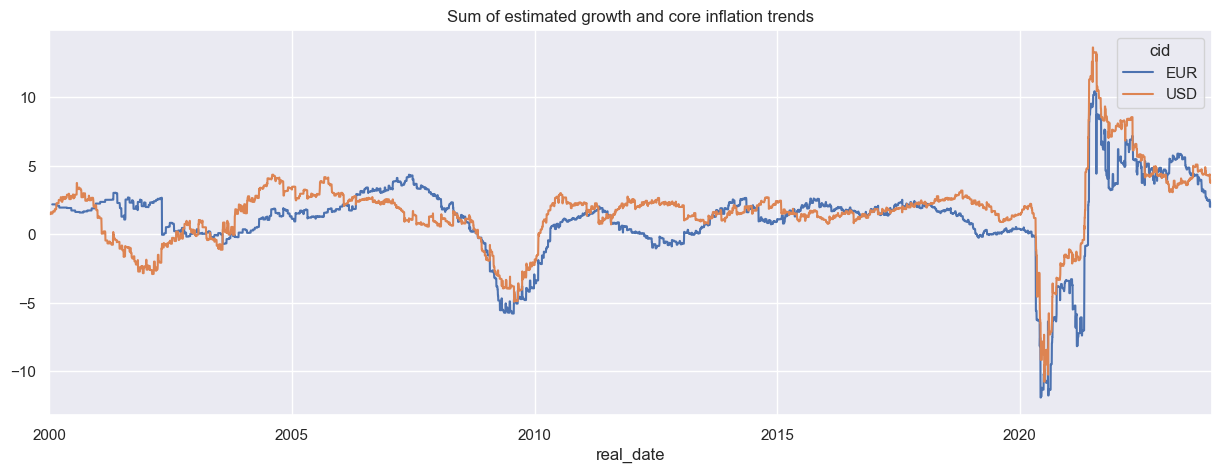

In [38]:
# Create an Inflation trend dataframe for selected currencies and pivot it to the wide format by currency identifyer

dfx_inf = dfd.loc[(dfd["xcat"] == "CPIC_SJA_P6M6ML6AR") & dfd['cid'].isin(['EUR', 'USD']), :]
dfw_inf = dfx.pivot_table(index='real_date', columns='cid', values='value').replace(0, np.nan)

# Create GDP trend dataframe for selected currencies and pivot it to wide format by currency identifyer 

dfx_gdp = dfd.loc[(dfd["xcat"] == "INTRGDPv5Y_NSA_P1M1ML12_3MMA") & dfd['cid'].isin(['EUR', 'USD']), :]
dfw_gdp = dfx.pivot_table(index='real_date', columns='cid', values='value').replace(0, np.nan)

# Add Inflation and GDP trend values by currency

dfw_ngdp = dfw_gdp + dfw_inf

# Add Inflation and GDP trend values by currency
sns.set(rc={'figure.figsize':(15,5)})
dfw_ngdp.plot(title="Sum of estimated growth and core inflation trends")
plt.show()

## Convert panels back to long format

Time series panels can be simply converted back to the long format by using the `.unstack()` method and added to the original dataframe, for subsequent processing.

In [39]:
dfl = dfw_ngdp.unstack().reset_index().rename(columns={0: "value"})
dfl['xcat'] = "NGDP_TREND"
dfl['ticker'] = dfl['cid'] + "_" + dfl['xcat'] 
dfd_new = pd.concat([dfd, dfl], axis=0, ignore_index=True)
dfd_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402555 entries, 0 to 3402554
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   real_date  datetime64[ns]
 1   cid        object        
 2   xcat       object        
 3   value      float64       
 4   grading    float64       
 5   eop_lag    float64       
 6   mop_lag    float64       
 7   ticker     object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 207.7+ MB


## Easy time series transformations

### Frequency conversion

The most common frequency conversion of quantamental panels is downsampling, i.e. reducing the frequency of the daily data to weekly, monthly, or quarterly by some aggregation method, such as `mean` or `last`.
The most flexible method for that purpose is `.resample()`, which can be combined with `.groupby()` to operate on specific tickers.

In [40]:
cids_sel = ['EUR', 'GBP']
xcats_sel = ["INTRGDPv5Y_NSA_P1M1ML12_3MMA", "INTRGDPv10Y_NSA_P1M1ML12_3MMA", "CPIC_SJA_P6M6ML6AR"]
dfx = dfd.loc[dfd["xcat"].isin(xcats_sel) & dfd['cid'].isin(cids_sel), :]
dfxm = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').last()['value'].reset_index()

dfxm.head(3)

C:\Users\jin_x\AppData\Local\Temp\ipykernel_31516\780406911.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfxm = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').last()['value'].reset_index()


,cid,xcat,real_date,value
0,EUR,CPIC_SJA_P6M6ML6AR,2000-01-31,1.093003
1,EUR,CPIC_SJA_P6M6ML6AR,2000-02-29,1.042372
2,EUR,CPIC_SJA_P6M6ML6AR,2000-03-31,0.975460


### Lagging

Like all other time series, quantamental panels can be transformed with standard time series methods, such as lags, differences, percent changes, and so forth. Only the interpretation here is different. Lagging here means that the availability of information is delayed. This allows aligning one date's information status with a subsequent period's return.

In [41]:
# Slice out a relevant dataframe

cids_sel = ['EUR', 'USD']
xcats_sel = ['CPIC_SJA_P6M6ML6AR', 'DU02YXR_NSA']
filt1 = dfd['cid'].isin(cids_sel)  # filter for cross sections
filt2 = dfd['xcat'].isin(xcats_sel)  #  filter for category
filt3 = dfd['real_date'] >= pd.to_datetime('2010-06-01')  # filter for start date
dfx = dfd[filt1 & filt2 & filt3]  # filter out relevant data frame

filt4 = dfx['xcat'] == xcats_sel[0]  # filter for selecting just CPI for subsequent frequency conversion and lagging
filt5 = dfx['xcat'] == xcats_sel[1]  # filter for selecting just IRS returns for subsequent frequency conversion and lagging

# Apply appropriate frequency conversion: last value or CPI inflation (predictor) and the sum of subsequent returns

dff1 = dfx[filt4].groupby(['cid', 'xcat']).resample('Q', on='real_date').last()['value'].reset_index()  # quarterly features based on last value
dff2 = dfx[filt5].groupby(['cid', 'xcat']).resample('Q', on='real_date').sum(numeric_only="True")['value'].reset_index() # quarterly features based on mean

# Shift returns forward by one period to prepare for regression analysis 

dff2['value'] = dff2.groupby(['xcat', 'cid'])['value'].shift()  # replace by lagged value
dff2.head()

C:\Users\jin_x\AppData\Local\Temp\ipykernel_31516\303556941.py:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dff1 = dfx[filt4].groupby(['cid', 'xcat']).resample('Q', on='real_date').last()['value'].reset_index()  # quarterly features based on last value
C:\Users\jin_x\AppData\Local\Temp\ipykernel_31516\303556941.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dff2 = dfx[filt5].groupby(['cid', 'xcat']).resample('Q', on='real_date').sum(numeric_only="True")['value'].reset_index() # quarterly features based on mean


,cid,xcat,real_date,value
0,EUR,DU02YXR_NSA,2010-06-30,NaN
1,EUR,DU02YXR_NSA,2010-09-30,-0.024612
2,EUR,DU02YXR_NSA,2010-12-31,-0.146008
3,EUR,DU02YXR_NSA,2011-03-31,-0.172114
4,EUR,DU02YXR_NSA,2011-06-30,-1.316241


### Differencing

A difference here means the difference in the information state of the market, not in the actual underlying economic concept. It shows how the market has updated its assessment of fundamentals.

In [42]:
# Slice out relevant dataframe

xcats_sel = ["CPIC_SJA_P6M6ML6AR", "INTRGDPv10Y_NSA_P1M1ML12_3MMA"]
cids_sel = ["EUR", "USD"]
dfx = dfd.loc[dfd["xcat"].isin(xcats_sel) & dfd['cid'].isin(cids_sel), :]

dfw = dfx.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)

# Apply name replacement

nicknames = {
  "CPIC_SJA_P6M6ML6AR": "CORE_CPI_TREND",
  "INTRGDPv10Y_NSA_P1M1ML12_3MMA": "GDP_TREND",
}  

colnames = list(dfw.columns)
for key, value in nicknames.items():
    colnames = [col.replace(key, value) for col in colnames]
dfw.columns = colnames

# Apply simple monthly conversion (takes last day's value). JPM's convention uses BM - "Business Month"

dfw = dfw.asfreq('BM')

# Take the first difference

dfw.diff().tail(3)

C:\Users\jin_x\AppData\Local\Temp\ipykernel_31516\1555871576.py:23: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  dfw = dfw.asfreq('BM')


,EUR_CORE_CPI_TREND,USD_CORE_CPI_TREND
real_date,,
2023-09-29,-0.367645,-0.225249
2023-10-31,-0.432909,-0.297982
2023-11-30,-0.477299,-0.360600


## Window operations

### Rolling windows

The most common window operations are based on rolling windows, such as rolling ("moving") averages or standard deviations.

Using rolling averages on quantamental data, which are information states, is equivalent to sticky or sluggish expectations.

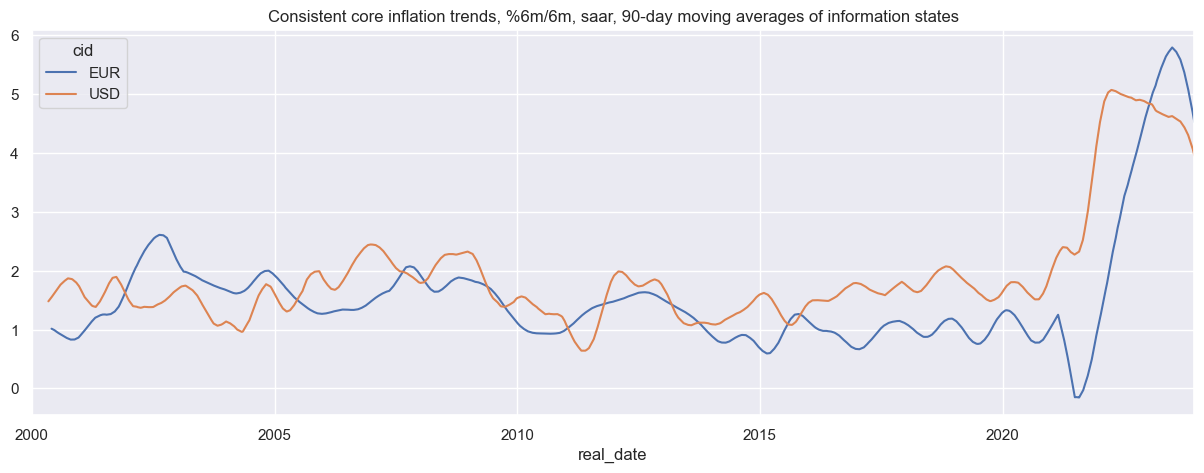

In [43]:
# Slice out the panel

dfx_inf = dfd.loc[(dfd["xcat"] == "CPIC_SJA_P6M6ML6AR") & dfd['cid'].isin(['EUR', 'USD']), :]
dfw_inf = dfx.pivot_table(index='real_date', columns='cid', values='value').replace(0, np.nan)

# Rolling 90 working day averages

sns.set(rc={'figure.figsize':(15,5)})
dfw_inf90 = dfw_inf.rolling(90).mean()
dfw_inf90.plot(title="Consistent core inflation trends, %6m/6m, saar, 90-day moving averages of information states")
plt.show()

### Expanding windows

Expanding window operations are likewise useful. Rather than applying a fixed lookback window, these operations use a lookback that increases with available history.

C:\Users\jin_x\AppData\Local\Temp\ipykernel_31516\2626469221.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfwm = dfw.resample('M').mean()  # monthly average information states on estimated growth


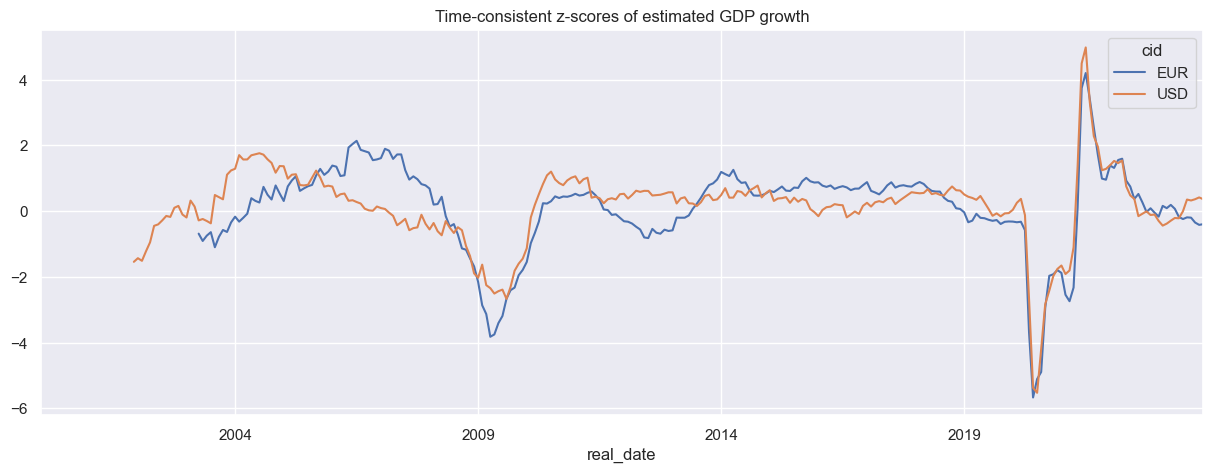

In [44]:
# Slice out single  category time series

dfx = dfd.loc[(dfd["xcat"].isin(["INTRGDPv5Y_NSA_P1M1ML12_3MMA", "INTRGDPv10Y_NSA_P1M1ML12_3MMA"]) & dfd['cid'].isin(['EUR', 'USD']))]

dfw = dfx.pivot_table(index='real_date', columns='cid', values='value').replace(0, np.nan)

dfwm = dfw.resample('M').mean()  # monthly average information states on estimated growth

# Z-score growth values estimated without using future information

dfwm_mean = dfwm.expanding(min_periods=24).mean()  # mean based on expanding window with minimum of 2-years required
dfwm_std = dfwm.expanding(min_periods=24).std()  # mean based on expanding window with minimum of 2-years required

sns.set(rc={'figure.figsize':(15,5)})
dfwm_z = (dfwm - dfwm_mean) / dfwm_std
dfwm_z.plot(title="Time-consistent z-scores of estimated GDP growth")
plt.show()